In [3]:
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sys.path.append("../../../")
from periodiclas.tools.util import LASdata
sns.set()

In [4]:
# DMRG Reference values
DMRGIP = -6.39
DMRGEA = 2.54

In [5]:
dpi = 200

plt.rcParams.update({
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'axes.labelsize': 28,
    'figure.dpi': dpi,
    'axes.grid': True,
    'grid.linestyle': '--',
    'figure.figsize':(16,10),
    'axes.titlesize':24
})

# Si-Fig 7

In [6]:
def getBand(nH, nHfrag):
    '''
    A list containing energy in au
    in this order: N, Ionized, EA
    '''
    pklfile = f'./hchain.{nHfrag}.{nH}.pkl'
    
    lasdata = LASdata(pkl_fn=pklfile, pct_pdft=0)
    
    homo_e = lasdata.get_homo()[0]
    lumo_e = lasdata.get_lumo()[0]
 
    IP = - max(homo_e)
    EA = - min(lumo_e)
    
    BandGap = IP-EA
    
    return IP, EA, BandGap

Extrapolated LAS IP to TDL: 6.6240 eV
Extrapolated LAS IP to 32H: 6.6959 eV
R² Score: 0.99328


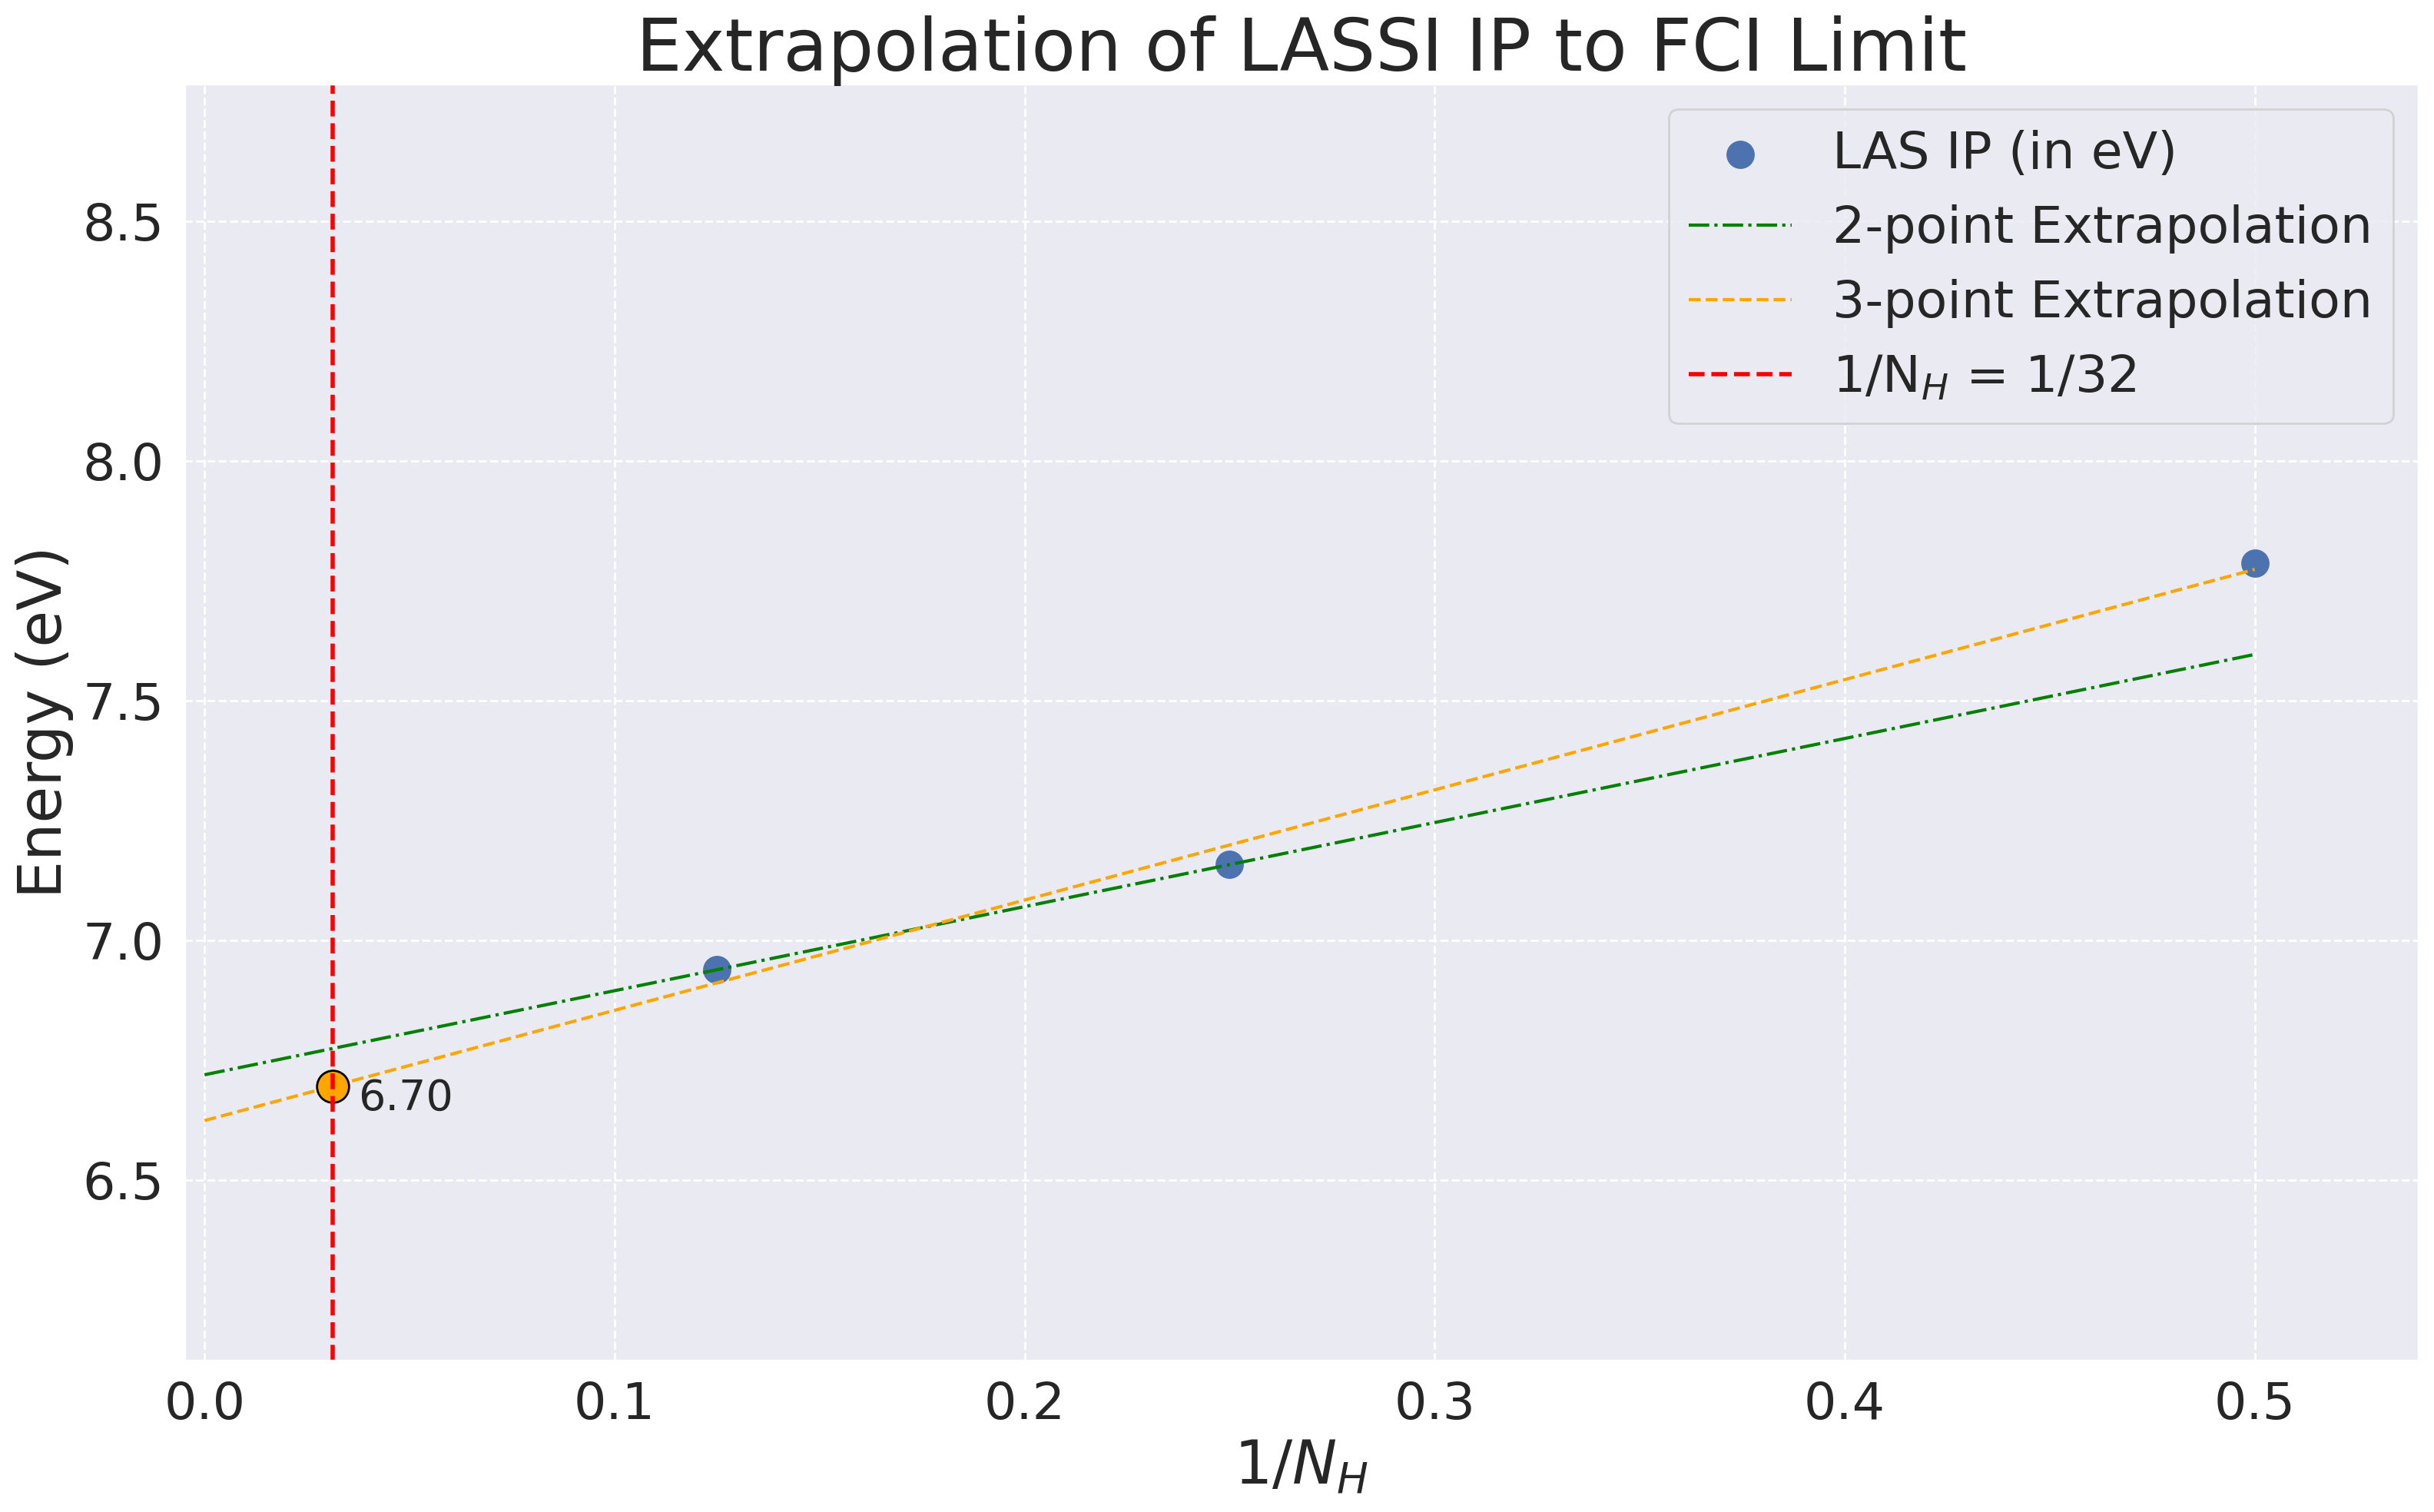

In [7]:
def LASIPextrapolation(nHfrag):
    '''
    nHydrogens is a list
    '''
    x0 =  np.array([1/x for x in nHfrag]).reshape(-1, 1)
    y0 =  np.array([getBand(32, x)[0] for x in nHfrag]).reshape(-1, 1)
    
    plt.figure()
    
    plt.scatter(x0,y0,label="LAS IP (in eV)", s=150)
    # 2-point extrapolation
    model = LinearRegression()
    model.fit(x0[1:], y0[1:])
    r2 = model.score(x0, y0)
    x_fit = np.linspace(0, max(x0), 100).reshape(-1, 1)
    y_fit = model.predict(x_fit)
    plt.plot(x_fit, y_fit, linestyle="-.", label="2-point Extrapolation", color='green')

    # 3-point extrapolation
    model = LinearRegression()
    model.fit(x0, y0)
    r2 = model.score(x0, y0)
    
    x_fit = np.linspace(0, max(x0), 100).reshape(-1, 1)
    y_fit = model.predict(x_fit)
    plt.plot(x_fit, y_fit, linestyle="--", label="3-point Extrapolation", color='orange')

    one_over_nH = 1/32

    plt.plot(one_over_nH, model.predict(np.asarray(1/32).reshape(-1,1))[0][0], marker='o', markersize=15, markeredgecolor='black',
         markerfacecolor='orange', linestyle='None')
    
    plt.text(1.2*one_over_nH, model.predict(np.asarray(1/32).reshape(-1,1))[0][0]-0.05, f"{model.predict(np.asarray(1/32).reshape(-1,1))[0][0]:.2f}", fontsize=20)

    plt.xlim(-0.005, 0.54)
    plt.ylim(model.intercept_[0] - 0.5, max(y0) + 1)
    plt.xticks()
    plt.yticks()
    plt.grid(True, linestyle='--')
    plt.ylabel("Energy (eV)")
    plt.xlabel(r"$1/N_{H}$")
    plt.title("Extrapolation of LASSI IP to FCI Limit", fontsize=34)
    plt.axvline(x=1/32, color='red', linestyle='--', linewidth=2, label='1/N$_H$ = 1/32')  # Red dashed line
    plt.legend(loc='best', fontsize=24)
    plt.tight_layout()
    print(f"Extrapolated LAS IP to TDL: {model.intercept_[0]:.4f} eV")
    print(f"Extrapolated LAS IP to 32H: {model.predict(np.asarray(1/32).reshape(-1,1))[0][0]:.4f} eV")
    print(f"R² Score: {r2:.5f}")
    return plt

plt = LASIPextrapolation([2, 4, 8])
plt.savefig('HChainIPExtrapolationtoFCI.png', dpi=dpi)

Extrapolated LAS EA: -3.0375 eV
Extrapolated LAS EA to 32H: -3.1114 eV
R² Score: 0.98405


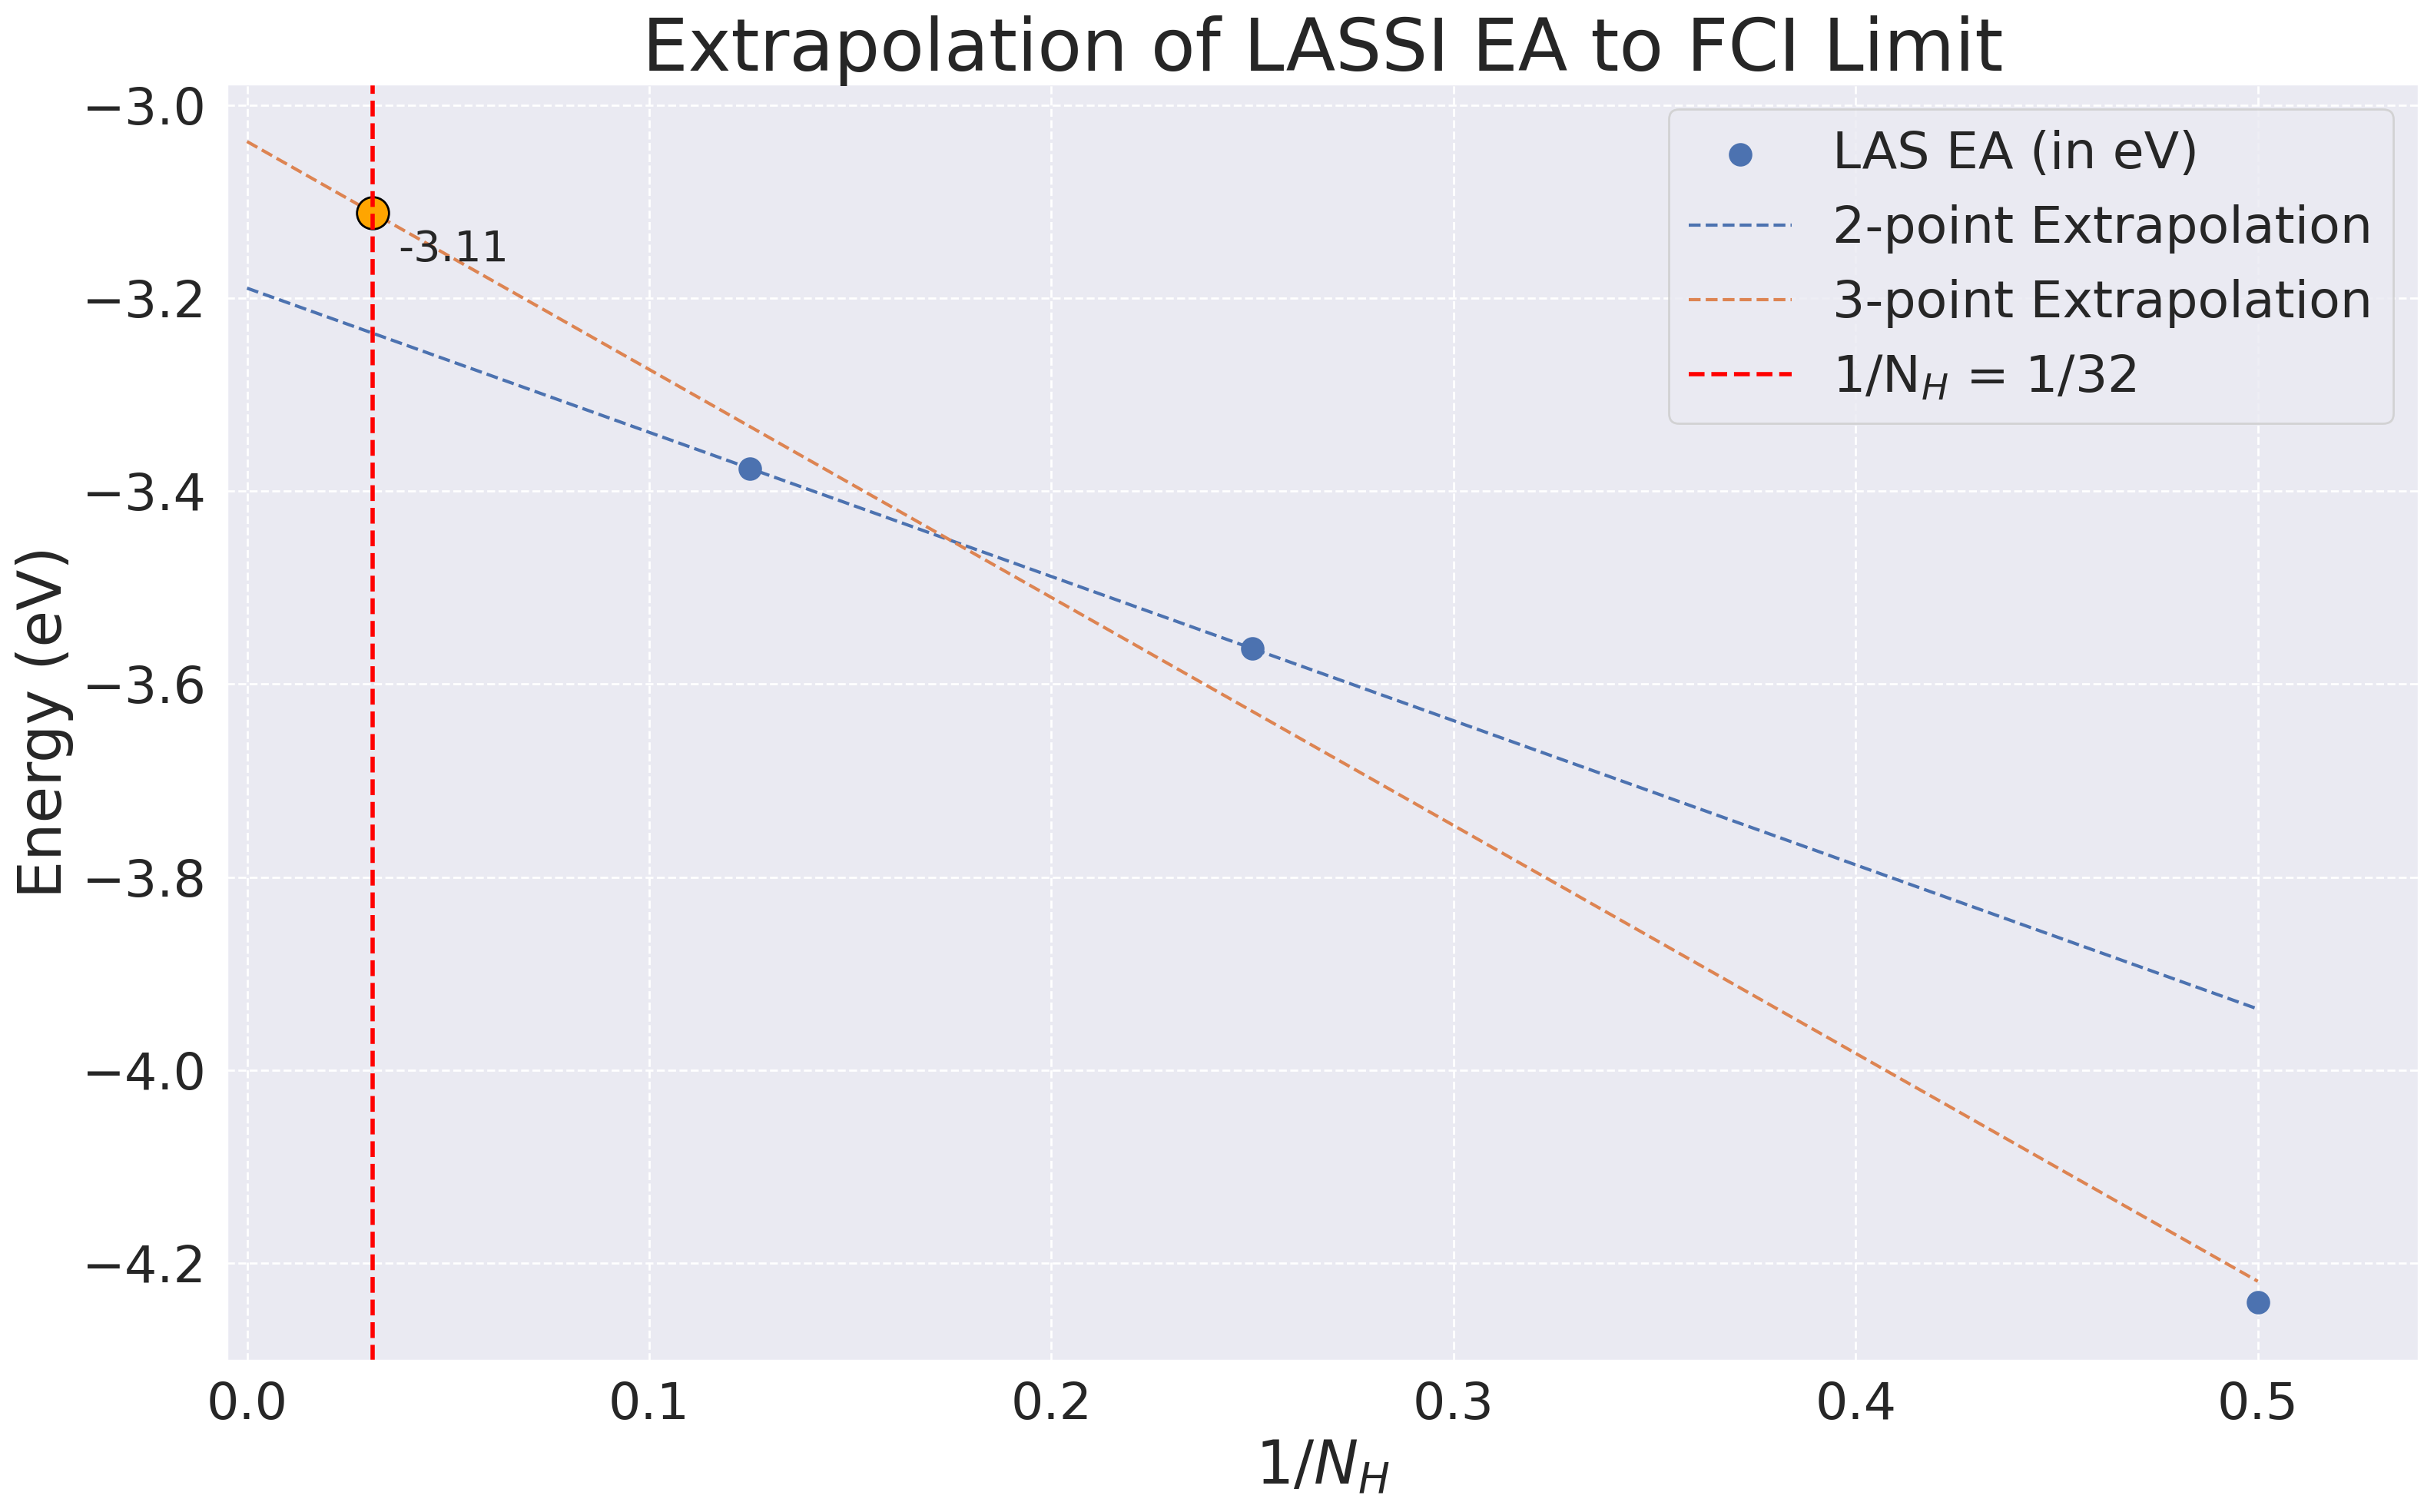

In [8]:
def LASEAextrapolation(nHfrag):
    '''
    nHydrogens is a list
    '''
    x0 =  np.array([1/x for x in nHfrag]).reshape(-1, 1)
    y0 =  np.array([getBand(32, x)[1] for x in nHfrag]).reshape(-1, 1)
    
    plt.figure()
    plt.scatter(x0,y0,label="LAS EA (in eV)", s=100)
    
    # 2-point extrapolation
    model = LinearRegression()
    model.fit(x0[1:], y0[1:])
    r2 = model.score(x0, y0)
    x_fit = np.linspace(0, max(x0), 100).reshape(-1, 1)
    y_fit = model.predict(x_fit)
    plt.plot(x_fit, y_fit, linestyle="--", label="2-point Extrapolation")

    # 3-point extrapolation
    model = LinearRegression()
    model.fit(x0, y0)
    r2 = model.score(x0, y0)
    x_fit = np.linspace(0, max(x0), 100).reshape(-1, 1)
    y_fit = model.predict(x_fit)

    one_over_nH = 1/32
    plt.plot(x_fit, y_fit, linestyle="--", label="3-point Extrapolation")

    plt.plot(one_over_nH, model.predict(np.asarray(1/32).reshape(-1,1))[0][0], marker='o', markersize=15, markeredgecolor='black',
         markerfacecolor='orange', linestyle='None')
    
    plt.text(1.2*one_over_nH, model.predict(np.asarray(1/32).reshape(-1,1))[0][0]-0.05, f"{model.predict(np.asarray(1/32).reshape(-1,1))[0][0]:.2f}", fontsize=20)

    plt.title("Extrapolation of EA")
    
    plt.xlim(-0.005, 0.54)
    plt.ylabel("Energy (eV)")
    plt.xlabel(r"$1/N_{H}$")
    plt.xticks()
    plt.yticks()
    plt.grid(True, linestyle='--')
    plt.title("Extrapolation of LASSI EA to FCI Limit", fontsize=34)
    plt.axvline(x=1/32, color='red', linestyle='--', linewidth=2, label='1/N$_H$ = 1/32')  # Red dashed line
    plt.legend(loc='best', fontsize=24)
    plt.tight_layout()
    print(f"Extrapolated LAS EA: {model.intercept_[0]:.4f} eV")
    print(f"Extrapolated LAS EA to 32H: {model.predict(np.asarray(1/32).reshape(-1,1))[0][0]:.4f} eV")
    print(f"R² Score: {r2:.5f}")
    return plt

plt = LASEAextrapolation([2, 4, 8])
plt.savefig('HChainEAExtrapolationtoFCI.png', dpi=dpi)